In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dsata Set for Assignment 1.csv')

In [3]:
df['diagnosis'] = df['diagnosis'].replace('B', 0)
df['diagnosis'] = df['diagnosis'].replace('M', 1)

# Feature Engineering Task 1:

In [4]:
#We first need to undersatand the number of missing values in each column
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#The NULL values are only present in continuous numerical values, so we fill it with the mean of exsisting values in the column
df_new=df
df_new['radius_mean'] = df_new['radius_mean'].replace(np.NaN, df_new['radius_mean'].mean())
df_new['perimeter_mean'] = df_new['perimeter_mean'].replace(np.NaN, df_new['perimeter_mean'].mean())
df_new['concavity_mean'] = df_new['concavity_mean'].replace(np.NaN, df_new['concavity_mean'].mean())
df_new['compactness_se'] = df_new['compactness_se'].replace(np.NaN, df_new['compactness_se'].mean())
df_new['area_worst'] = df_new['area_worst'].replace(np.NaN, df_new['area_worst'].mean())
df_new['concavity_worst'] = df_new['concavity_worst'].replace(np.NaN, df_new['concavity_worst'].mean())

In [6]:
# We have successfully added the missing values
df.isnull().sum().sum()

0

# Feature Engineering Task 2

In [7]:
# Normalizing all the features and saving it in a new DataFrame
normalized_df=df_new
normalized_df.iloc[:,2:]=df_new.iloc[:,2:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [8]:
# The Normalized DataSet is shown below
normalized_df.head

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1     1.102422     -2.071512        1.268389   
1      842517          1     1.836635     -0.353322        1.684639   
2    84300903          1     1.586206      0.455786        1.565122   
3    84348301          1    -0.767260      0.253509       -0.595257   
4    84358402          1     1.756953     -1.150804        1.775308   
..        ...        ...          ...           ...             ...   
564    926424          1     2.118368      0.720838        2.059677   
565    926682          1     1.711420      2.083301        1.614577   
566    926954          1     0.706858      2.043775        0.670803   
567    927241          1     1.845172      2.334403        1.981372   
568     92751          0    -1.808817      1.220718       -1.817631   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     0.983510         1.567087          3.28062

# Part A - Perceptron Learning Algorithm:

# Part B – Fisher’s Linear Discriminant Analysis:

## Learning Task 1:

In [9]:
# Removing rows that contain NuLL values 
df.dropna().shape

(569, 32)

In [10]:
target_name = "diagnosis"

y = df[target_name]

x = df.drop(['id', 'diagnosis'], axis=1)

In [11]:
x_train = x.sample(frac=0.66, random_state=25)
x_test = x.drop(x_train.index)

print(f"No. of training examples: {x_train.shape}")
print(f"No. of testing examples: {x_test.shape}")

No. of training examples: (376, 30)
No. of testing examples: (193, 30)


In [12]:
y_train = y.sample(frac=0.66)
y_test = y.drop(y_train.index)

print(f"No. of training examples: {y_train.shape}")
print(f"No. of testing examples: {y_test.shape}")

No. of training examples: (376,)
No. of testing examples: (193,)


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [14]:
x_train_lda.shape, x_test_lda.shape

((376, 1), (193, 1))

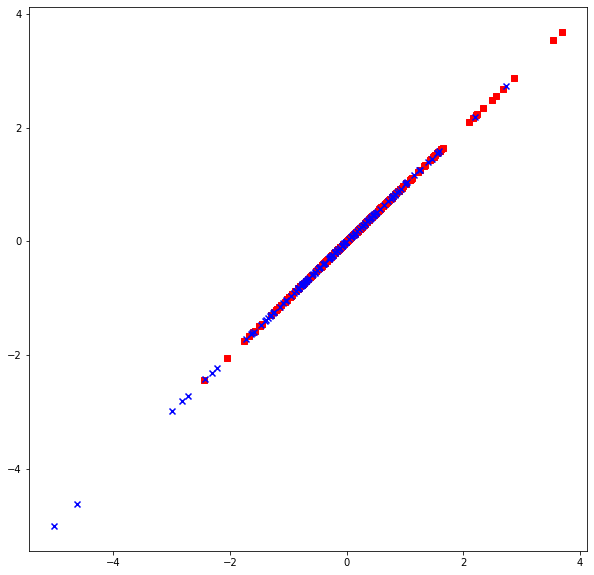

In [15]:
markers = ['s','x']
colors = ['r','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(x_train_lda[:,0][y_train==l],x_train_lda[:,0][y_train==l],c=c,marker=m)
    

## Learning Task 2:

In [16]:
#Change the order of features in the dataset randomly.

x=np.random.randint(30, size=(30))

x_train_FLDM2= x_train.iloc[:, x]
x_test_FLDM2= x_train.iloc[:, x]


In [17]:
x_train_FLDM2
#Viewing the changed dataset

,smoothness_se,radius_se,radius_se,radius_mean,concave points_se,perimeter_worst,radius_se,concavity_se,texture_mean,smoothness_se,...,fractal_dimension_mean,fractal_dimension_se,texture_worst,symmetry_se,compactness_mean,texture_worst,fractal_dimension_worst,texture_mean,symmetry_worst,area_mean
522,-0.946199,-0.976414,-0.976414,-0.812792,-1.252963,-0.919014,-0.976414,-0.929161,0.125633,-0.946199,...,0.089569,-0.566842,0.122477,-0.686190,-1.140084,0.122477,-0.432739,0.125633,-0.555632,-0.758109
120,-0.333380,-0.953335,-0.953335,-0.770105,-0.864812,-0.699983,-0.953335,-0.555015,-1.969211,-0.333380,...,-0.236193,-0.600477,-1.579371,-0.859180,-0.709885,-1.579371,0.071101,-1.969211,0.186276,-0.714916
241,-1.257604,-1.045289,-1.045289,-0.482681,-1.302069,-0.696710,-1.045289,-0.841472,-0.988052,-1.257604,...,-0.744666,-0.920196,-0.863489,-0.404325,-1.333219,-0.863489,-0.892286,-0.988052,0.000395,-0.506911
362,-0.477259,-0.663049,-0.663049,-0.385924,-0.291581,-0.578564,-0.663049,-0.550046,-0.104544,-0.477259,...,-0.137048,-0.628065,0.050889,-0.175688,-0.469981,0.050889,-0.640366,-0.104544,-0.253373,-0.449795
221,-0.396327,-0.534675,-0.534675,-0.158261,-0.556885,-0.183356,-0.534675,-0.213798,-1.253105,-0.396327,...,0.032915,-0.331398,-1.390639,-0.256739,0.281353,-1.390639,-0.120469,-1.253105,0.265478,-0.265943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,-0.951195,-0.256649,-0.256649,0.573106,-0.442303,0.757049,-0.256649,-0.174044,-0.327746,-0.951195,...,0.333183,0.008351,0.257519,-0.424890,0.976261,0.257519,2.178927,-0.327746,2.213189,0.432807
266,0.142887,0.163454,0.163454,-1.000614,0.300450,-0.862471,0.163454,0.054538,-0.078969,0.142887,...,0.299190,-0.180231,-0.445348,1.753817,0.196146,-0.445348,-0.447135,-0.078969,0.063433,-0.876603
85,-0.189834,1.062079,1.062079,1.236174,0.389587,1.337363,1.062079,-0.127003,-0.178945,-0.189834,...,-0.365082,-0.015080,0.325853,0.381994,0.018159,0.325853,0.102107,-0.178945,1.283783,1.193788
518,-0.588832,0.134967,0.134967,-0.351775,0.104349,-0.236625,0.134967,-0.591124,-0.248696,-0.588832,...,1.378455,-0.187411,-0.212686,-0.288192,1.169396,-0.212686,0.275960,-0.248696,-0.515223,-0.459740


In [18]:
x_train_lda_FLDM2 = lda.fit_transform(x_train_FLDM2, y_train)
x_test_lda_FLDM2 = lda.transform(x_test_FLDM2)

In [19]:
x_train_lda_FLDM2.shape, x_test_lda_FLDM2.shape

((376, 1), (376, 1))

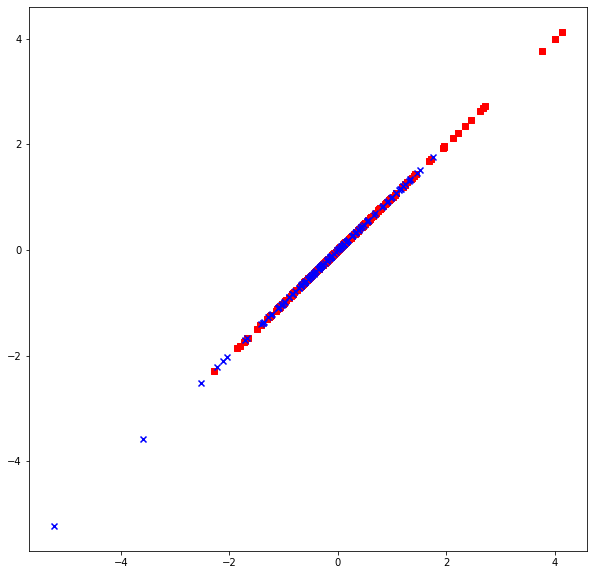

In [20]:
markers = ['s','x']
colors = ['r','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(x_train_lda_FLDM2[:,0][y_train==l],x_train_lda_FLDM2[:,0][y_train==l],c=c,marker=m)
    

# Part C – Logistic Regression:

## Learning Task 1

In [21]:
x_train_LR = x_train.values
y_train_LR = y_train.values
x_test_LR = x_test.values
y_test_LR = y_test.values

In [22]:
x_train_LR = x_train_LR.T
y_train_LR = y_train_LR.reshape(1, 376)
#arr1 =y_train.to_numpy()
#arr1.reshape(1, y_train.shape[0])
#y_train = pd.DataFrame(arr1)


x_test_LR = x_test_LR.T
y_test_LR = y_test_LR.reshape(1, 193)
#arr2 =y_test.to_numpy()
#arr2.reshape(1, y_test.shape[0])
#y_test = pd.DataFrame(arr2)


In [23]:
print("Shape of X_train : ", x_train_LR.shape)
print("Shape of Y_train : ", y_train_LR.shape)
print("Shape of X_test : ", x_test_LR.shape)
print("Shape of Y_test : ", y_test_LR.shape)

Shape of X_train :  (30, 376)
Shape of Y_train :  (1, 376)
Shape of X_test :  (30, 193)
Shape of Y_test :  (1, 193)


In [24]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [25]:
def model(X, Y, learning_rate, iterations):
    
    m = x_train_LR.shape[1]
    n = x_train_LR.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [26]:
iterations = 100000
# We can alter the value of learning_rate
learning_rate = 0.001
W, B, cost_list = model(x_train_LR, y_train_LR, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.6411661443393095
cost after  20000 iteration is :  0.6391675530970325
cost after  30000 iteration is :  0.6380947875045605
cost after  40000 iteration is :  0.6372574188174047
cost after  50000 iteration is :  0.636566850266396
cost after  60000 iteration is :  0.6359849501478968
cost after  70000 iteration is :  0.6354888038696107
cost after  80000 iteration is :  0.6350623437653659
cost after  90000 iteration is :  0.6346934259827106


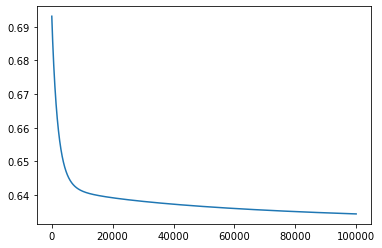

In [27]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [28]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
# We can alter the value of Probability Threshhold
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")


In [29]:
accuracy(x_test_LR, y_test_LR, W, B)


Accuracy of the model is :  59.59 %


### Comparison with Sckitlearn learn

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5854922279792746

## Learning Task 2

In [31]:
target_name = "diagnosis"

y_norm = normalized_df[target_name]

x_norm = normalized_df.drop(['id', 'diagnosis'], axis=1)

In [32]:
x_train_norm = x_norm.sample(frac=0.66, random_state=25)
x_test_norm = x_norm.drop(x_train_norm.index)

print(f"No. of training examples: {x_train_norm.shape}")
print(f"No. of testing examples: {x_test_norm.shape}")

No. of training examples: (376, 30)
No. of testing examples: (193, 30)


In [33]:
y_train_norm = y_norm.sample(frac=0.66)
y_test_norm = y_norm.drop(y_train_norm.index)

print(f"No. of training examples: {y_train_norm.shape}")
print(f"No. of testing examples: {y_test_norm.shape}")

No. of training examples: (376,)
No. of testing examples: (193,)


In [34]:
x_train_norm_LR = x_train_norm.values
y_train_norm_LR = y_train_norm.values
x_test_norm_LR = x_test_norm.values
y_test_norm_LR = y_test_norm.values

In [35]:
x_train_norm_LR = x_train_norm_LR.T
y_train_norm_LR = y_train_norm_LR.reshape(1, 376)

x_test_norm_LR = x_test_norm_LR.T
y_test_norm_LR = y_test_norm_LR.reshape(1, 193)

In [36]:
print("Shape of X_train : ", x_train_norm_LR.shape)
print("Shape of Y_train : ", y_train_norm_LR.shape)
print("Shape of X_test : ", x_test_norm_LR.shape)
print("Shape of Y_test : ", y_test_norm_LR.shape)

Shape of X_train :  (30, 376)
Shape of Y_train :  (1, 376)
Shape of X_test :  (30, 193)
Shape of Y_test :  (1, 193)


In [37]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [38]:
def model(X, Y, learning_rate, iterations):
    
    m = x_train_norm_LR.shape[1]
    n = x_train_norm_LR.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [39]:
iterations = 100000
# We can alter the value of learning_rate
learning_rate = 0.001
W, B, cost_list = model(x_train_norm_LR, y_train_norm_LR, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.6424728776334978
cost after  20000 iteration is :  0.6379345439571944
cost after  30000 iteration is :  0.6356054112297316
cost after  40000 iteration is :  0.634027967522642
cost after  50000 iteration is :  0.6328445151546249
cost after  60000 iteration is :  0.6319113113802899
cost after  70000 iteration is :  0.631153332469195
cost after  80000 iteration is :  0.6305241717145557
cost after  90000 iteration is :  0.6299923592267616


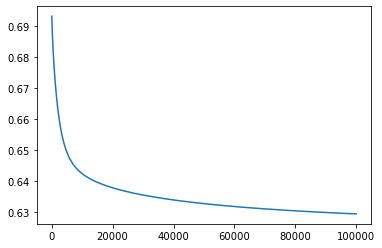

In [40]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [41]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
# We can alter the value of Probability Threshhold
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")


In [42]:
accuracy(x_test_norm_LR, y_test_norm_LR, W, B)


Accuracy of the model is :  56.99 %


### Comparison with Sckitlearn learn

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(x_train_norm, y_train_norm)
predictions = logmodel.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5854922279792746